## 1. Import libraries

In [1]:
import pandas as pd
from IPython.display import display

## 2. Import Datasets

In [2]:
training_set_labels = pd.read_csv(r'.\Data\training_set_labels.csv')
training_set_features = pd.read_csv(r'.\Data\training_set_features.csv')
test_set_features = pd.read_csv(r'.\Data\test_set_features.csv')

print ('Training Set Labels:')
display (training_set_labels.head())

print ('Training Set Features:')
display (training_set_features.head())

print ('Test Set Features:')
display (test_set_features.head())

Training Set Labels:


,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


Training Set Features:


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


Test Set Features:


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


#### Merge datasets

Add the training_set_labels to both the test_set_features and training_set_features dataframes.

In [3]:
# Merge training_set_labels.csv to training_set_features
training_set_df = pd.merge(training_set_labels, training_set_features, on='respondent_id', how='inner')

# Add training_set_labels to test_set_features
test_set_df = pd.concat([training_set_labels, test_set_features], axis=1)

## 3. Exploratory data analysis

In [4]:
training_set_df.shape

(26707, 38)

In [5]:
training_set_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_vaccine                 26707 non-null  int64  
 2   seasonal_vaccine             26707 non-null  int64  
 3   h1n1_concern                 26615 non-null  float64
 4   h1n1_knowledge               26591 non-null  float64
 5   behavioral_antiviral_meds    26636 non-null  float64
 6   behavioral_avoidance         26499 non-null  float64
 7   behavioral_face_mask         26688 non-null  float64
 8   behavioral_wash_hands        26665 non-null  float64
 9   behavioral_large_gatherings  26620 non-null  float64
 10  behavioral_outside_home      26625 non-null  float64
 11  behavioral_touch_face        26579 non-null  float64
 12  doctor_recc_h1n1             24547 non-null  float64
 13  doctor_recc_seas

#### Categorical variables

In [6]:
# Find categorical variables with dtype object
categorical = [var for var in training_set_df.columns if training_set_df[var].dtype == 'O']

training_set_df[categorical].columns

Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation'],
      dtype='object')

training_set_df has 12 categorical variables:

    - age_group
    - education
    - race
    - sex
    - income_poverty
    - marital_status
    - rent_or_own
    - employment_status
    - hhs_geo_region
    - census_msa
    - employment_industry
    - employment_occupation

Drop the following columns

    - employment_industry
    - employment_occupation
    - rent_or_own

In [7]:
training_set_df = training_set_df.drop(columns=['employment_industry', 'employment_occupation', 'rent_or_own'])

categorical = [var for var in training_set_df.columns if training_set_df[var].dtype == 'O']

training_set_df[categorical].columns

Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'employment_status', 'hhs_geo_region', 'census_msa'],
      dtype='object')

In [8]:
training_set_df[categorical].isna().sum()

age_group               0
education            1407
race                    0
sex                     0
income_poverty       4423
marital_status       1408
employment_status    1463
hhs_geo_region          0
census_msa              0
dtype: int64

Check for cardiality of the categorical variables ...

In [9]:
training_set_df[categorical].nunique()

age_group             5
education             4
race                  4
sex                   2
income_poverty        3
marital_status        2
employment_status     3
hhs_geo_region       10
census_msa            3
dtype: int64

Check for frequency distribution in the training_set_df

In [10]:
import numpy as np 
for var in training_set_df: 
    
    print(training_set_df[var].value_counts()/np.float64(len(training_set_df)))

respondent_id
0        0.000037
17736    0.000037
17812    0.000037
17811    0.000037
17810    0.000037
           ...   
8898     0.000037
8897     0.000037
8896     0.000037
8895     0.000037
26706    0.000037
Name: count, Length: 26707, dtype: float64
h1n1_vaccine
0    0.787546
1    0.212454
Name: count, dtype: float64
seasonal_vaccine
0    0.534392
1    0.465608
Name: count, dtype: float64
h1n1_concern
2.0    0.395964
1.0    0.305276
3.0    0.171902
0.0    0.123413
Name: count, dtype: float64
h1n1_knowledge
1.0    0.546598
2.0    0.355225
0.0    0.093833
Name: count, dtype: float64
behavioral_antiviral_meds
0.0    0.948628
1.0    0.048714
Name: count, dtype: float64
behavioral_avoidance
1.0    0.719961
0.0    0.272251
Name: count, dtype: float64
behavioral_face_mask
0.0    0.930355
1.0    0.068933
Name: count, dtype: float64
behavioral_wash_hands
1.0    0.824316
0.0    0.174112
Name: count, dtype: float64
behavioral_large_gatherings
0.0    0.639271
1.0    0.357472
Name: count, dtyp

## 4. One Hot Encoding 

Start OHE on categorical columns with null values.

In [11]:
# OHE for all categorical columns, add additional columns for missing data
training_set_categorical = pd.get_dummies(training_set_df[categorical], drop_first= True, dummy_na= True, dtype= int)

# Drop columns where nans=0
training_set_categorical = training_set_categorical.loc[:, (training_set_categorical != 0).any(axis=0)]

training_set_categorical.head()

,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_< 12 Years,education_College Graduate,education_Some College,education_nan,race_Hispanic,race_Other or Multiple,...,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
training_set_categorical.shape

(26707, 31)

In [13]:
training_set_categorical.isna().sum()

age_group_35 - 44 Years                 0
age_group_45 - 54 Years                 0
age_group_55 - 64 Years                 0
age_group_65+ Years                     0
education_< 12 Years                    0
education_College Graduate              0
education_Some College                  0
education_nan                           0
race_Hispanic                           0
race_Other or Multiple                  0
race_White                              0
sex_Male                                0
income_poverty_> $75,000                0
income_poverty_Below Poverty            0
income_poverty_nan                      0
marital_status_Not Married              0
marital_status_nan                      0
employment_status_Not in Labor Force    0
employment_status_Unemployed            0
employment_status_nan                   0
hhs_geo_region_bhuqouqj                 0
hhs_geo_region_dqpwygqj                 0
hhs_geo_region_fpwskwrf                 0
hhs_geo_region_kbazzjca           

#### Dtype 'int' Categorical Variables 

In [14]:
training_set_numeric = training_set_df.select_dtypes(include= 'number')
training_set_numeric.columns

Index(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine', 'h1n1_concern',
       'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object')

In [15]:
training_set_numeric.isna().sum()

respondent_id                      0
h1n1_vaccine                       0
seasonal_vaccine                   0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
household_adults                 249
household_children               249
dtype: int64

To reduce the number of columns during OHE of numeric variables, in columns with null values < 200, fill na with the modal value.

In [16]:
# Identify columns with na < 200
def fill_na_less_200(column):
    if column.isna().sum() < 200:
        modal_value = column.mode()[0]
        return column.fillna(modal_value)
    return column

training_set_numeric = training_set_numeric.apply(fill_na_less_200)
training_set_numeric.isna().sum()

respondent_id                      0
h1n1_vaccine                       0
seasonal_vaccine                   0
h1n1_concern                       0
h1n1_knowledge                     0
behavioral_antiviral_meds          0
behavioral_avoidance             208
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face              0
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
household_adults                 249
household_children               249
dtype: int64

OHE on numeric variables

In [17]:
# Drop id column
training_set_numeric = training_set_numeric.drop(columns=['respondent_id'])


In [18]:
from sklearn.preprocessing import OneHotEncoder

training_set_numeric = training_set_numeric.astype(str).fillna('NA')

ohe = OneHotEncoder(drop= 'first', sparse_output= False, dtype= int)

training_set_numeric = training_set_numeric.fillna('NA')
columns_nan = training_set_numeric.columns[(training_set_numeric == 0).all()]
columns_nan.nunique()

ohe.fit(training_set_numeric)
training_set_numeric_encoded = ohe.transform(training_set_numeric)

training_set_numeric = pd.DataFrame(training_set_numeric_encoded, columns=ohe.get_feature_names_out(training_set_numeric.columns))

training_set_numeric.nunique()

h1n1_vaccine_1            2
seasonal_vaccine_1        2
h1n1_concern_1.0          2
h1n1_concern_2.0          2
h1n1_concern_3.0          2
                         ..
household_adults_nan      2
household_children_1.0    2
household_children_2.0    2
household_children_3.0    2
household_children_nan    2
Length: 65, dtype: int64

In [19]:
training_set_df = pd.concat([training_set_numeric, training_set_categorical], axis= 1)
training_set_df.shape

(26707, 96)

## Data cleaning test data

In [20]:
test_set_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  float64
 1   h1n1_vaccine                 26707 non-null  float64
 2   seasonal_vaccine             26707 non-null  float64
 3   respondent_id                26708 non-null  int64  
 4   h1n1_concern                 26623 non-null  float64
 5   h1n1_knowledge               26586 non-null  float64
 6   behavioral_antiviral_meds    26629 non-null  float64
 7   behavioral_avoidance         26495 non-null  float64
 8   behavioral_face_mask         26689 non-null  float64
 9   behavioral_wash_hands        26668 non-null  float64
 10  behavioral_large_gatherings  26636 non-null  float64
 11  behavioral_outside_home      26626 non-null  float64
 12  behavioral_touch_face        26580 non-null  float64
 13  doctor_recc_h1n1

In [21]:
# Drop the following columns: employment_industry, employment_occupation, rent_or_own, 'respondent_id'
test_set_df = test_set_df.drop(columns= ['employment_industry', 'employment_occupation', 'rent_or_own', 'respondent_id'])

# Check for missing values
test_set_df.isna().sum()

h1n1_vaccine                       1
seasonal_vaccine                   1
h1n1_concern                      85
h1n1_knowledge                   122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
i

Use mode and OHE to fill in missing values

In [22]:
# Where a column has a na < 200, fill na with the modal value.
def fill_na_less_200(column):
    if column.isna().sum() < 200:
        modal_value = column.mode()[0]
        return column.fillna(modal_value)
    return column

test_set_df = test_set_df.apply(fill_na_less_200)

In [23]:
# OHE the test_set_df

# Identify categorical variables with dtype object
test_categorical = [var for var in test_set_df.columns if test_set_df[var].dtype == 'O']

# OHE for all categorical columns, add additional columns for missing data
test_categorical = pd.get_dummies(test_set_df[test_categorical], drop_first= True, dummy_na= True, dtype= int)

# Drop columns where nans=0
test_categorical = test_categorical.loc[:, (test_categorical != 0).any(axis=0)]

test_categorical.isna().sum()

age_group_35 - 44 Years                 0
age_group_45 - 54 Years                 0
age_group_55 - 64 Years                 0
age_group_65+ Years                     0
education_< 12 Years                    0
education_College Graduate              0
education_Some College                  0
education_nan                           0
race_Hispanic                           0
race_Other or Multiple                  0
race_White                              0
sex_Male                                0
income_poverty_> $75,000                0
income_poverty_Below Poverty            0
income_poverty_nan                      0
marital_status_Not Married              0
marital_status_nan                      0
employment_status_Not in Labor Force    0
employment_status_Unemployed            0
employment_status_nan                   0
hhs_geo_region_bhuqouqj                 0
hhs_geo_region_dqpwygqj                 0
hhs_geo_region_fpwskwrf                 0
hhs_geo_region_kbazzjca           

In [24]:
test_categorical.shape

(26708, 31)

In [25]:
# Identify categotical variables with dtype int
test_numeric = test_set_df.select_dtypes(include= 'number')

# Fill na with 'NA' where na is a string
test_numeric = test_numeric.astype(str).fillna('NA')

# OHE 
ohe = OneHotEncoder(drop= 'first', sparse_output= False, dtype= int)

# test_numeric = test_numeric.fillna('NA')
# columns_nan = test_numeric.columns[(test_numeric == 0).all()]
# columns_nan.nunique()

ohe.fit(test_numeric)
test_numeric_encoded = ohe.transform(test_numeric)

test_numeric = pd.DataFrame(test_numeric_encoded, columns=ohe.get_feature_names_out(test_numeric.columns))

test_numeric.isna().sum()

h1n1_vaccine_1.0          0
seasonal_vaccine_1.0      0
h1n1_concern_1.0          0
h1n1_concern_2.0          0
h1n1_concern_3.0          0
                         ..
household_adults_nan      0
household_children_1.0    0
household_children_2.0    0
household_children_3.0    0
household_children_nan    0
Length: 65, dtype: int64

In [26]:
test_set_df = pd.concat([test_categorical, test_numeric], axis= 1)
test_set_df.shape

(26708, 96)

In [27]:
test_set_df = test_set_df.rename(columns={'h1n1_vaccine_1.0':'h1n1_vaccine_1', 'seasonal_vaccine_1.0':'seasonal_vaccine_1'})
test_set_df = test_set_df[training_set_df.columns]

## Train test

In [28]:
from sklearn.model_selection import train_test_split

# Define X and y
y = training_set_df['h1n1_vaccine_1']
X = training_set_df.drop(columns= 'h1n1_vaccine_1')


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

X_train.shape, X_test.shape

((21365, 95), (5342, 95))

In [29]:
X_train.describe()

,seasonal_vaccine_1,h1n1_concern_1.0,h1n1_concern_2.0,h1n1_concern_3.0,h1n1_knowledge_1.0,h1n1_knowledge_2.0,behavioral_antiviral_meds_1.0,behavioral_avoidance_1.0,behavioral_avoidance_nan,behavioral_face_mask_1.0,...,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA
count,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,...,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000
mean,0.467306,0.306717,0.398923,0.171589,0.550012,0.356939,0.049193,0.718980,0.007629,0.070302,...,0.042312,0.121554,0.109057,0.078259,0.159420,0.082659,0.108963,0.117061,0.293939,0.272268
std,0.498942,0.461141,0.489688,0.377032,0.497504,0.479108,0.216275,0.449508,0.087014,0.255661,...,0.201305,0.326778,0.311718,0.268585,0.366075,0.275372,0.311600,0.321500,0.455575,0.445137
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Model training

####     a. h1n1_vaccine

In [30]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', random_state= 42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

Predict results

In [31]:
y_pred_test = logreg.predict(X_test)
y_pred_test

array([0, 0, 0, ..., 1, 0, 0])

In [32]:
y_pred_train = logreg.predict(X_train)
y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

Compare accuracy score

In [33]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

print('Training_set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score: 0.8680
Training_set accuracy score: 0.8700


Check for overfitting and underfitting

In [34]:
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8700
Test set score: 0.8680


Compare model accuracy with null accuracy

In [35]:
y_test.value_counts()

h1n1_vaccine_1
0    4212
1    1130
Name: count, dtype: int64

In [36]:
null_accuracy = (4212/(4212+1130))

print('Null accuracy score: {0:04f}'.format(null_accuracy))

Null accuracy score: 0.788469


Check for probabilities of y pred

In [37]:
y_pred_prob = logreg.predict_proba(X_test)

y_pred_prob_df = pd.DataFrame(data= y_pred_prob, columns=['no h1n1_vaccine (0)', 'yes h1n1_vaccine (1)'])
y_pred_prob_df

,no h1n1_vaccine (0),yes h1n1_vaccine (1)
0,0.883116,0.116884
1,0.633374,0.366626
2,0.986290,0.013710
3,0.854798,0.145202
4,0.980184,0.019816
...,...,...
5337,0.549692,0.450308
5338,0.921455,0.078545
5339,0.420767,0.579233
5340,0.988587,0.011413


A histogram of predicted probabilities

Text(0, 0.5, 'frequency')

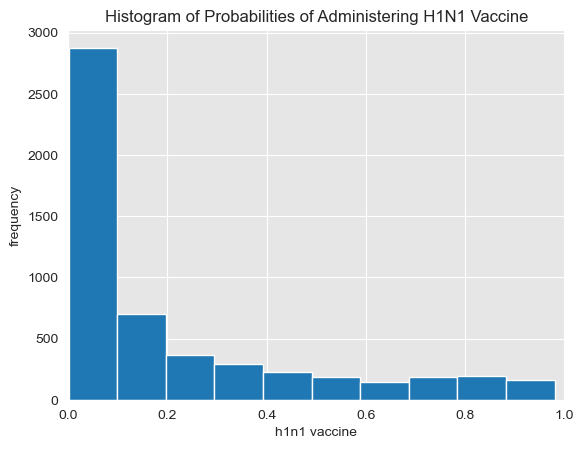

In [38]:
# Strore the probabilities of yes vaccine
y_pred1 = logreg.predict_proba(X_test)[:, 1]

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# Plot a histogram of the predicted probabilities
plt.hist(y_pred1, bins= 10)
plt.title('Histogram of Probabilities of Administering H1N1 Vaccine')
plt.xlim(0,1)

plt.xlabel('h1n1 vaccine')
plt.ylabel('frequency')


## ROC curve

Measure the classification model performance

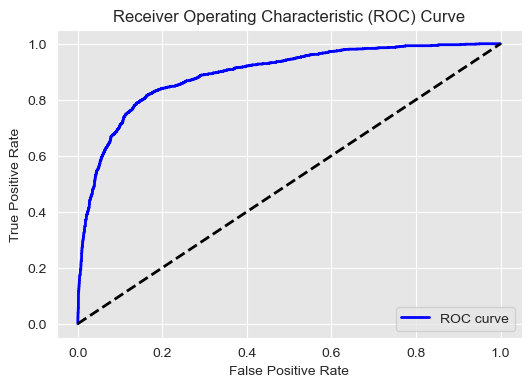

In [39]:
# Plot AUC Curve
from sklearn.metrics import roc_curve, auc

y_score = logreg.fit(X_train, y_train).decision_function(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_score)

plt.figure(figsize= (6, 4))
lw= 2
plt.plot(fpr, tpr, color= 'blue', lw= lw, label= 'ROC curve')

plt.plot([0, 1], [0, 1], color= 'black', lw= lw, linestyle= '--')

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc= 'lower right')
plt.show()

ROC-AUC

In [40]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4F}'.format(ROC_AUC))

ROC AUC : 0.8924


Fit the test_set_df into the model

In [41]:
test_set_df1 = test_set_df[X_train.columns]

for col in X_train.columns:
    if col not in test_set_df1.columns:
        test_set_df1[col] = 0

In [42]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter= 1000)
model.fit(X_train, y_train)

# Predict for y in the test_set_df
y_predictions_prob = model.predict_proba(test_set_df1)
y_predictions_prob_df = pd.DataFrame(data= y_predictions_prob, columns=['no h1n1_vaccine (0)', 'yes h1n1_vaccine (1)'])
y_predictions_prob_df = y_predictions_prob_df.round(1).drop(columns= ['no h1n1_vaccine (0)'])
y_predictions_prob_df

,yes h1n1_vaccine (1)
0,0.1
1,0.2
2,0.1
3,0.6
4,0.2
...,...
26703,0.1
26704,0.3
26705,0.1
26706,0.0


## Traintest split

b. seasonal_vaccine as y

In [43]:
# Define X and y
y = training_set_df['seasonal_vaccine_1']
X = training_set_df.drop(columns= 'seasonal_vaccine_1')


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

X_train.shape, X_test.shape

((21365, 95), (5342, 95))

In [44]:
X_train.describe()

,h1n1_vaccine_1,h1n1_concern_1.0,h1n1_concern_2.0,h1n1_concern_3.0,h1n1_knowledge_1.0,h1n1_knowledge_2.0,behavioral_antiviral_meds_1.0,behavioral_avoidance_1.0,behavioral_avoidance_nan,behavioral_face_mask_1.0,...,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA
count,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,...,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000
mean,0.212684,0.306717,0.398923,0.171589,0.550012,0.356939,0.049193,0.718980,0.007629,0.070302,...,0.042312,0.121554,0.109057,0.078259,0.159420,0.082659,0.108963,0.117061,0.293939,0.272268
std,0.409216,0.461141,0.489688,0.377032,0.497504,0.479108,0.216275,0.449508,0.087014,0.255661,...,0.201305,0.326778,0.311718,0.268585,0.366075,0.275372,0.311600,0.321500,0.455575,0.445137
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Train model

In [45]:
logreg001 = LogisticRegression(C= 100, solver='liblinear', random_state= 42)
logreg001.fit(X_train, y_train)

LogisticRegression(C=100, random_state=42, solver='liblinear')

In [46]:
# Compare model accuracy score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

print('Training_set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))


Model accuracy score: 0.6818
Training_set accuracy score: 0.6783


In [47]:
# Check for overfitting and underfitting

print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.8027
Test set score: 0.8085


In [48]:
y_test.value_counts()

seasonal_vaccine_1
0    2891
1    2451
Name: count, dtype: int64

In [49]:
# Compare model accuracy with null accuracy

null_accuracy = (4212/(4212+1130))

print('Null accuracy score: {0:04f}'.format(null_accuracy))

Null accuracy score: 0.788469


Cross validation

In [50]:
# K-fold cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg001, X_train, y_train, cv=10, scoring= 'accuracy')

print('Cross validation score: {}'.format(scores))

Cross validation score: [0.81235377 0.80486664 0.80065512 0.79410388 0.81422555 0.78464419
 0.77902622 0.79681648 0.79166667 0.82397004]


In [51]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8002


The model's average cross validation score of 0.80 is higher than the original model score of 0.6783. This is indicates that the model has good generalization and robustness.

In [52]:
# Check the probabilities of y_pred

y_pred_prob = logreg001.predict_proba(X_test)

y_pred_prob_df = pd.DataFrame(data= y_pred_prob, columns=['no seasonal_vaccine (0)', 'yes seasonal_vaccine (1)'])
y_pred_prob_df

,no seasonal_vaccine (0),yes seasonal_vaccine (1)
0,0.833889,0.166111
1,0.867780,0.132220
2,0.158789,0.841211
3,0.819210,0.180790
4,0.852104,0.147896
...,...,...
5337,0.043515,0.956485
5338,0.772232,0.227768
5339,0.296090,0.703910
5340,0.391313,0.608687


Text(0, 0.5, 'frequency')

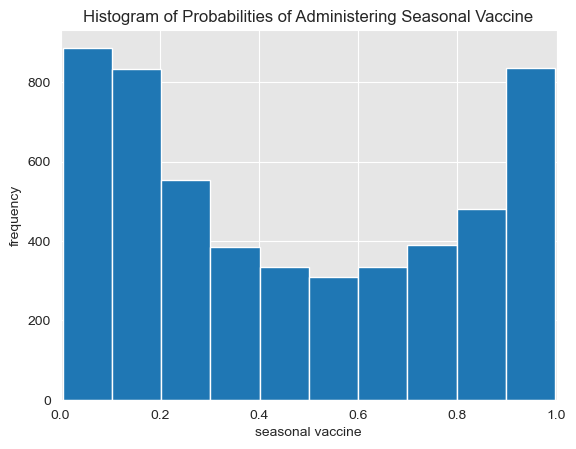

In [53]:
# Store the probabilities of yes vaccine
y_pred1 = logreg001.predict_proba(X_test)[:, 1]

# Plot a histogram of the predicted probabilities
plt.hist(y_pred1, bins= 10)
plt.title('Histogram of Probabilities of Administering Seasonal Vaccine')
plt.xlim(0,1)

plt.xlabel('seasonal vaccine')
plt.ylabel('frequency')

This is a bimodial distribution which may be the cause of low model accuracy caused by presence of distinct groups with different characteristics thus affecting the models generalization.

Use decision trees as they are not heavily affected by this assumptions.

## Decision trees

In [54]:
from sklearn.tree import DecisionTreeClassifier

# Define X and y
y = training_set_df['seasonal_vaccine_1']
X = training_set_df.drop(columns= 'seasonal_vaccine_1')


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

# Train and fit X_train into a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth= 10, criterion= 'entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [55]:
clf = clf.fit(X_train, y_train)
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [56]:
predictions = clf.predict(X_test)
predictions

array([0, 0, 1, ..., 0, 0, 0])

In [57]:
pred_proba = clf.predict_proba(X_test)
pred_proba

array([[0.83236994, 0.16763006],
       [0.83236994, 0.16763006],
       [0.33333333, 0.66666667],
       ...,
       [0.625     , 0.375     ],
       [1.        , 0.        ],
       [0.52      , 0.48      ]])

In [58]:
accuracy_score(y_test, predictions)

0.7751778360164733

In [59]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions, labels=[0, 1])

array([[2337,  554],
       [ 647, 1804]], dtype=int64)

In [60]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions, target_names= ['vaccinated', 'not vaccinated']))

                precision    recall  f1-score   support

    vaccinated       0.78      0.81      0.80      2891
not vaccinated       0.77      0.74      0.75      2451

      accuracy                           0.78      5342
     macro avg       0.77      0.77      0.77      5342
  weighted avg       0.77      0.78      0.77      5342



Text(0, 0.5, 'frequency')

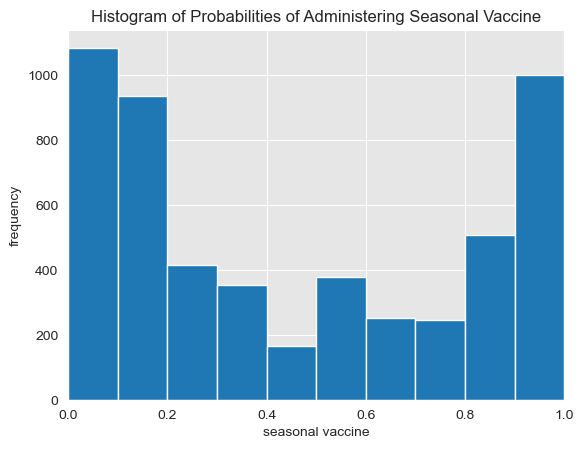

In [61]:
# Store the probabilities of yes vaccine
y_pred1 = clf.predict_proba(X_test)[:, 1]

# Plot a histogram of the predicted probabilities
plt.hist(y_pred1, bins= 10)
plt.title('Histogram of Probabilities of Administering Seasonal Vaccine')
plt.xlim(0,1)

plt.xlabel('seasonal vaccine')
plt.ylabel('frequency')

In [62]:
feature_names = X.columns
feature_relevance = pd.DataFrame(clf.feature_importances_, index= feature_names).sort_values(0, ascending= False)
feature_relevance.head(20)

,0
h1n1_vaccine_1,0.244573
opinion_seas_vacc_effective_5.0,0.180401
doctor_recc_seasonal_1.0,0.121461
age_group_65+ Years,0.055206
opinion_seas_risk_4.0,0.044079
doctor_recc_h1n1_1.0,0.039985
opinion_seas_risk_5.0,0.026888
opinion_seas_risk_2.0,0.013768
age_group_55 - 64 Years,0.011340
income_poverty_Below Poverty,0.010724


<Axes: >

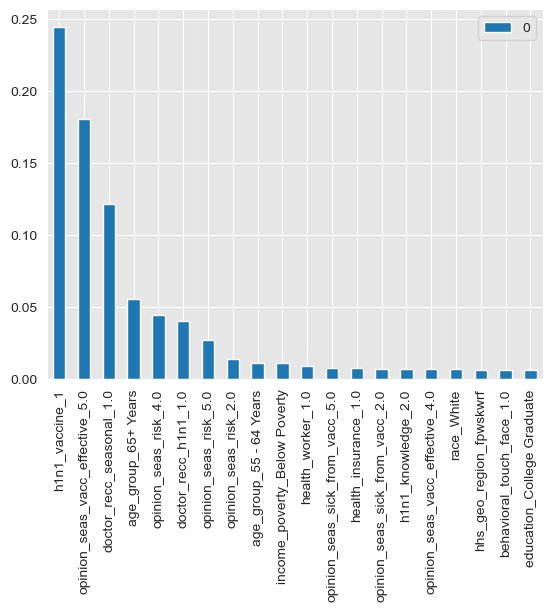

In [63]:
feature_relevance.head(20).plot(kind= 'bar')

In [64]:
test_set_df2 = test_set_df[X_train.columns]

model = DecisionTreeClassifier(max_depth= 10, criterion= 'entropy')
model.fit(X_train, y_train)

# Predict for y in the test_set_df
y_predictions_prob = model.predict_proba(test_set_df2)
y_predictions_prob_df1 = pd.DataFrame(data= y_predictions_prob, columns=['no seasonal_vaccine (0)', 'yes seasonal_vaccine (1)'])
y_predictions_prob_df1 = y_predictions_prob_df1.round(1).drop(columns= ['no seasonal_vaccine (0)'])
y_predictions_prob_df1

,yes seasonal_vaccine (1)
0,0.1
1,0.0
2,1.0
3,0.0
4,0.4
...,...
26703,0.3
26704,0.3
26705,0.2
26706,0.0


In [65]:
predictions_df = pd.concat([test_set_features['respondent_id'], y_predictions_prob_df, y_predictions_prob_df1], axis=1)
predictions_df = predictions_df.rename(columns= {'yes h1n1_vaccine (1)':'h1n1_vaccine', 'yes seasonal_vaccine (1)': 'seasonal_vaccine'})
predictions_df

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.1,0.1
1,26708,0.2,0.0
2,26709,0.1,1.0
3,26710,0.6,0.0
4,26711,0.2,0.4
...,...,...,...
26703,53410,0.1,0.3
26704,53411,0.3,0.3
26705,53412,0.1,0.2
26706,53413,0.0,0.0


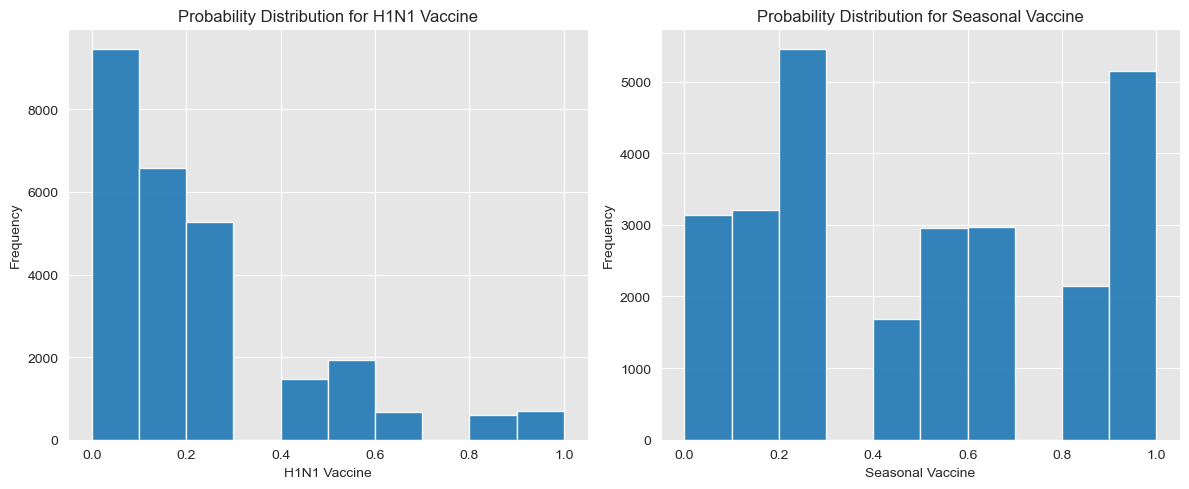

In [66]:
# Plot histograms of the predicted probabilities
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Histogram for H1N1 vaccine probabilities
axes[0].hist(y_predictions_prob_df, bins=10, alpha=0.9)
axes[0].set_xlabel('H1N1 Vaccine')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Probability Distribution for H1N1 Vaccine')

# Histogram for Seasonal vaccine probabilities
axes[1].hist(y_predictions_prob_df1, bins=10, alpha=0.9)
axes[1].set_xlabel('Seasonal Vaccine')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Probability Distribution for Seasonal Vaccine')

# Adjust layout
plt.tight_layout()
plt.show()